# Evaluating $\Omega$ and $\Sigma$

The following code was written in order to better understand the arguments given in **Section 11.4. Classical Ideal Gas** (Pages 11,12) by R K Pathria in his popular book on Statistical Mechanics (ISBN : 9380931891)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
start_time = time.time()
from mpl_toolkits.mplot3d import axes3d
from tabulate import tabulate

Matplotlib is building the font cache; this may take a moment.


# Plotting the points for 3 dimensions

Here I have tried to plot the points satisfying 
$$ n_x^2 + n_y^2 + n_z^2 = \epsilon^* $$

I have assumed some simple values to get an idea about the statement made in the textbook:
$$ n_x , n_y , n_z = \lbrace1,2,\ldots,100\rbrace $$
and
$$ \epsilon^* = 99 $$

In [2]:
nx,ny,nz = np.linspace(1,100,100),np.linspace(1,100,100),np.linspace(1,100,100)
e_star = 99

## $\epsilon^* = 99$

The code below tries all combinations of values for $n_x , n_y$ and $n_z$ to try a solution corresponding to $\epsilon^* = 1000$

In [3]:
start_time = time.time()
count=0
solutions1 = []
for x in nx:
    for y in ny:
        for z in nz:
            if x**2 + y**2 + z**2 == e_star:
                solutions1.append([x,y,z])
                count+=1
print("--- Executed in %s seconds ---" % round(time.time() - start_time,1))
print("Number of solutions: ",count)
print("Solutions:")
print(tabulate(solutions1, headers=['x', 'y','z'], tablefmt='fancy_grid'))

--- Executed in 1.3 seconds ---
Number of solutions:  9
Solutions:
╒═════╤═════╤═════╕
│   x │   y │   z │
╞═════╪═════╪═════╡
│   1 │   7 │   7 │
├─────┼─────┼─────┤
│   3 │   3 │   9 │
├─────┼─────┼─────┤
│   3 │   9 │   3 │
├─────┼─────┼─────┤
│   5 │   5 │   7 │
├─────┼─────┼─────┤
│   5 │   7 │   5 │
├─────┼─────┼─────┤
│   7 │   1 │   7 │
├─────┼─────┼─────┤
│   7 │   5 │   5 │
├─────┼─────┼─────┤
│   7 │   7 │   1 │
├─────┼─────┼─────┤
│   9 │   3 │   3 │
╘═════╧═════╧═════╛


From the output, we see that there are 9 solutions to this particular value of $\epsilon^*$ if the $n_i$-s are in the range $[1,100]$.

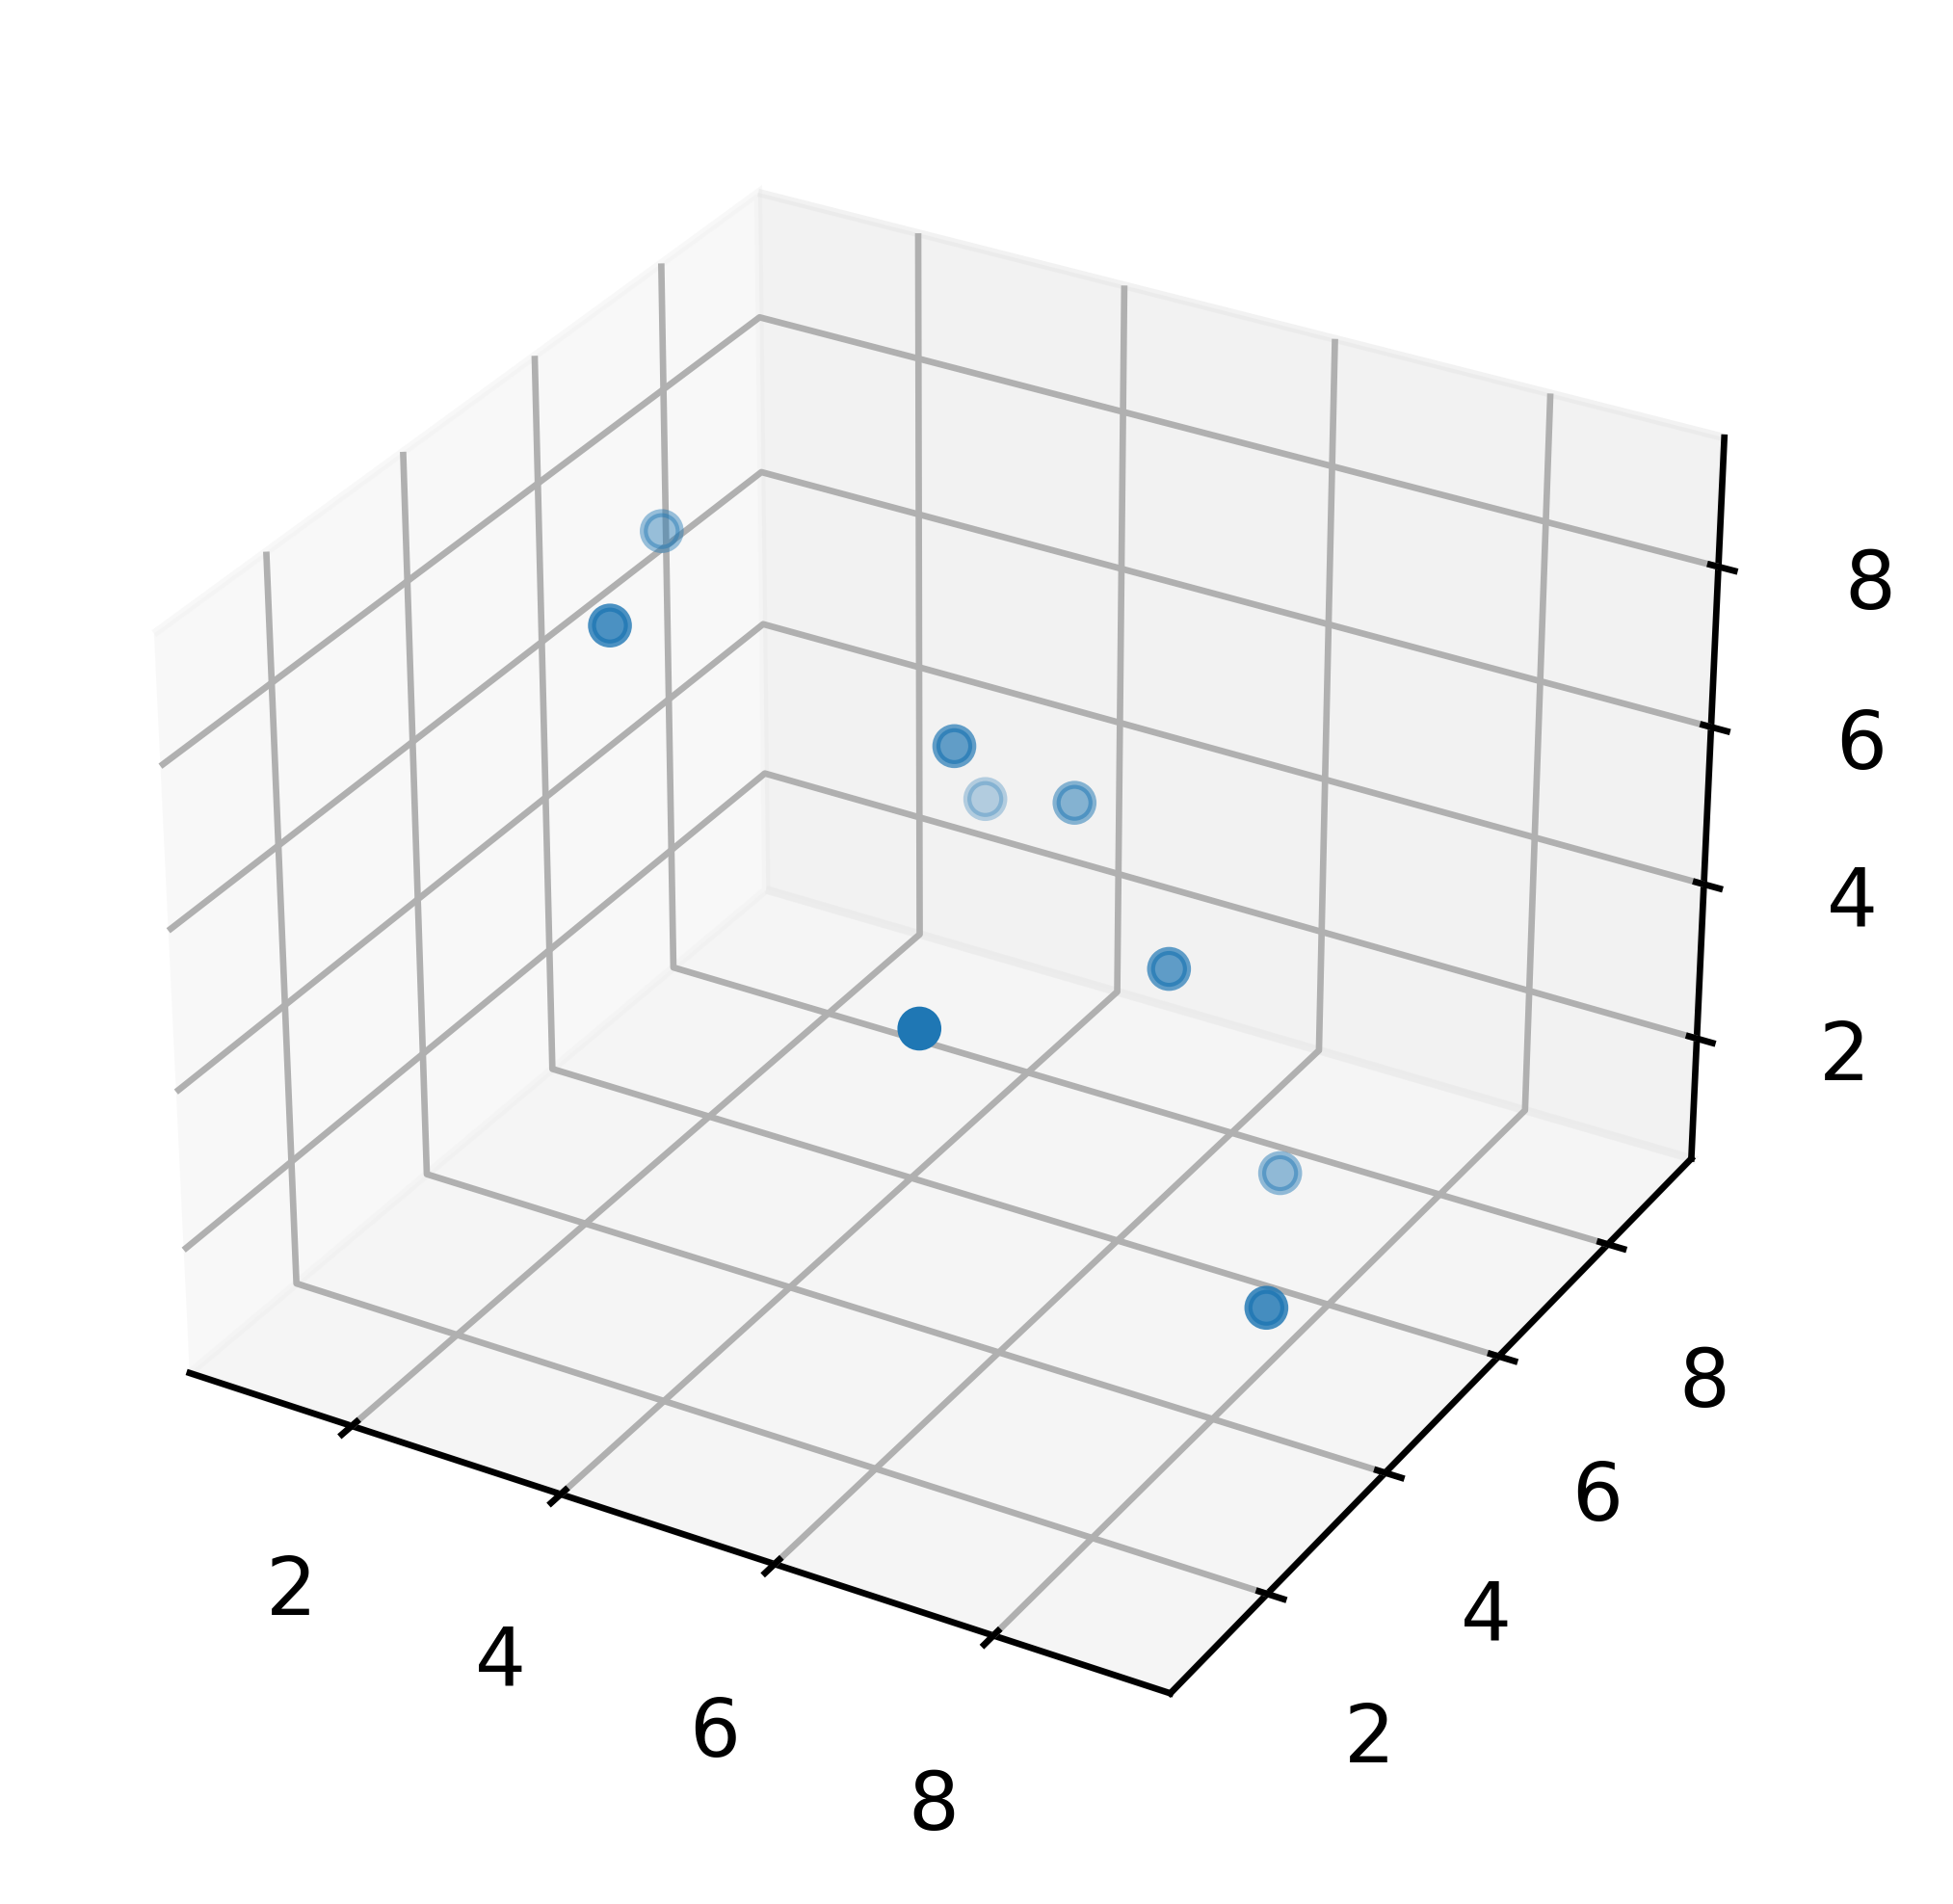

In [4]:
X = []
Y = []
Z = []
for i in range(len(solutions1)):
    X.append(solutions1[i][0])
    Y.append(solutions1[i][1])
    Z.append(solutions1[i][2])
    
fig = plt.figure(dpi=600)
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z,'red')
fig.savefig('plot1.png')

The points are scattered on the **first octant** of a sphere of radius $\sqrt{E^*}$, as expected.

Here's a plot including the surface of the sphere:

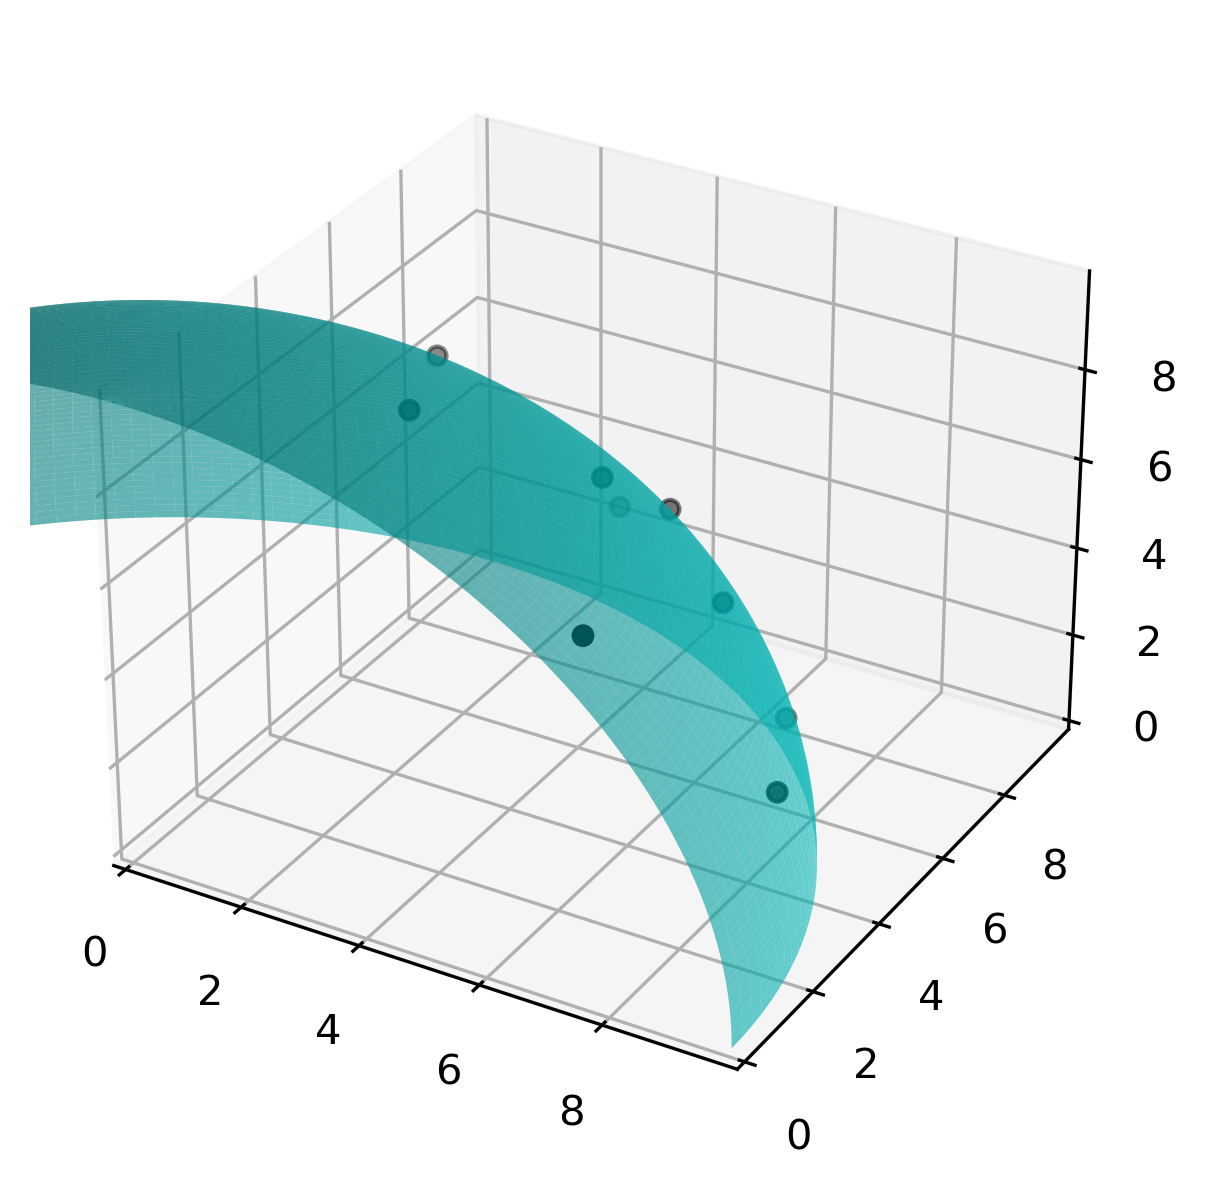

In [5]:
r = np.sqrt(e_star)
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi/2:100j, 0.0:1.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0)
ax.scatter(X,Y,Z,color="k",s=20)
ax.set_xlim([0,r])
ax.set_ylim([0,r])
ax.set_zlim([0,r])
plt.tight_layout()

## $\epsilon^* \leq 99$

Now let us check for solutions such that $\epsilon^* \leq 99$

In [6]:
# start_time = time.time()
E_star = np.arange(0,99,1)
count=0
Sigma_solutions = []
for Es in E_star:
    for x in nx:
        for y in ny:
            for z in nz:
                if x**2 + y**2 + z**2 == Es:
                    Sigma_solutions.append([x,y,z])
                    count+=1
# print("--- Executed in %s seconds ---" % round(time.time() - start_time,1))
print("Number of solutions = ",count)
# print("Solutions:")
# print(tabulate(solutions1[-1], headers=['x', 'y','z'], tablefmt='fancy_grid'))

Number of solutions =  401


The output says that there are 401 solutions in this case, _i.e.,_ the number of positive lattice points _lying on or within_ the surface of the sphere of radius $\sqrt{E^*}$ is 401.

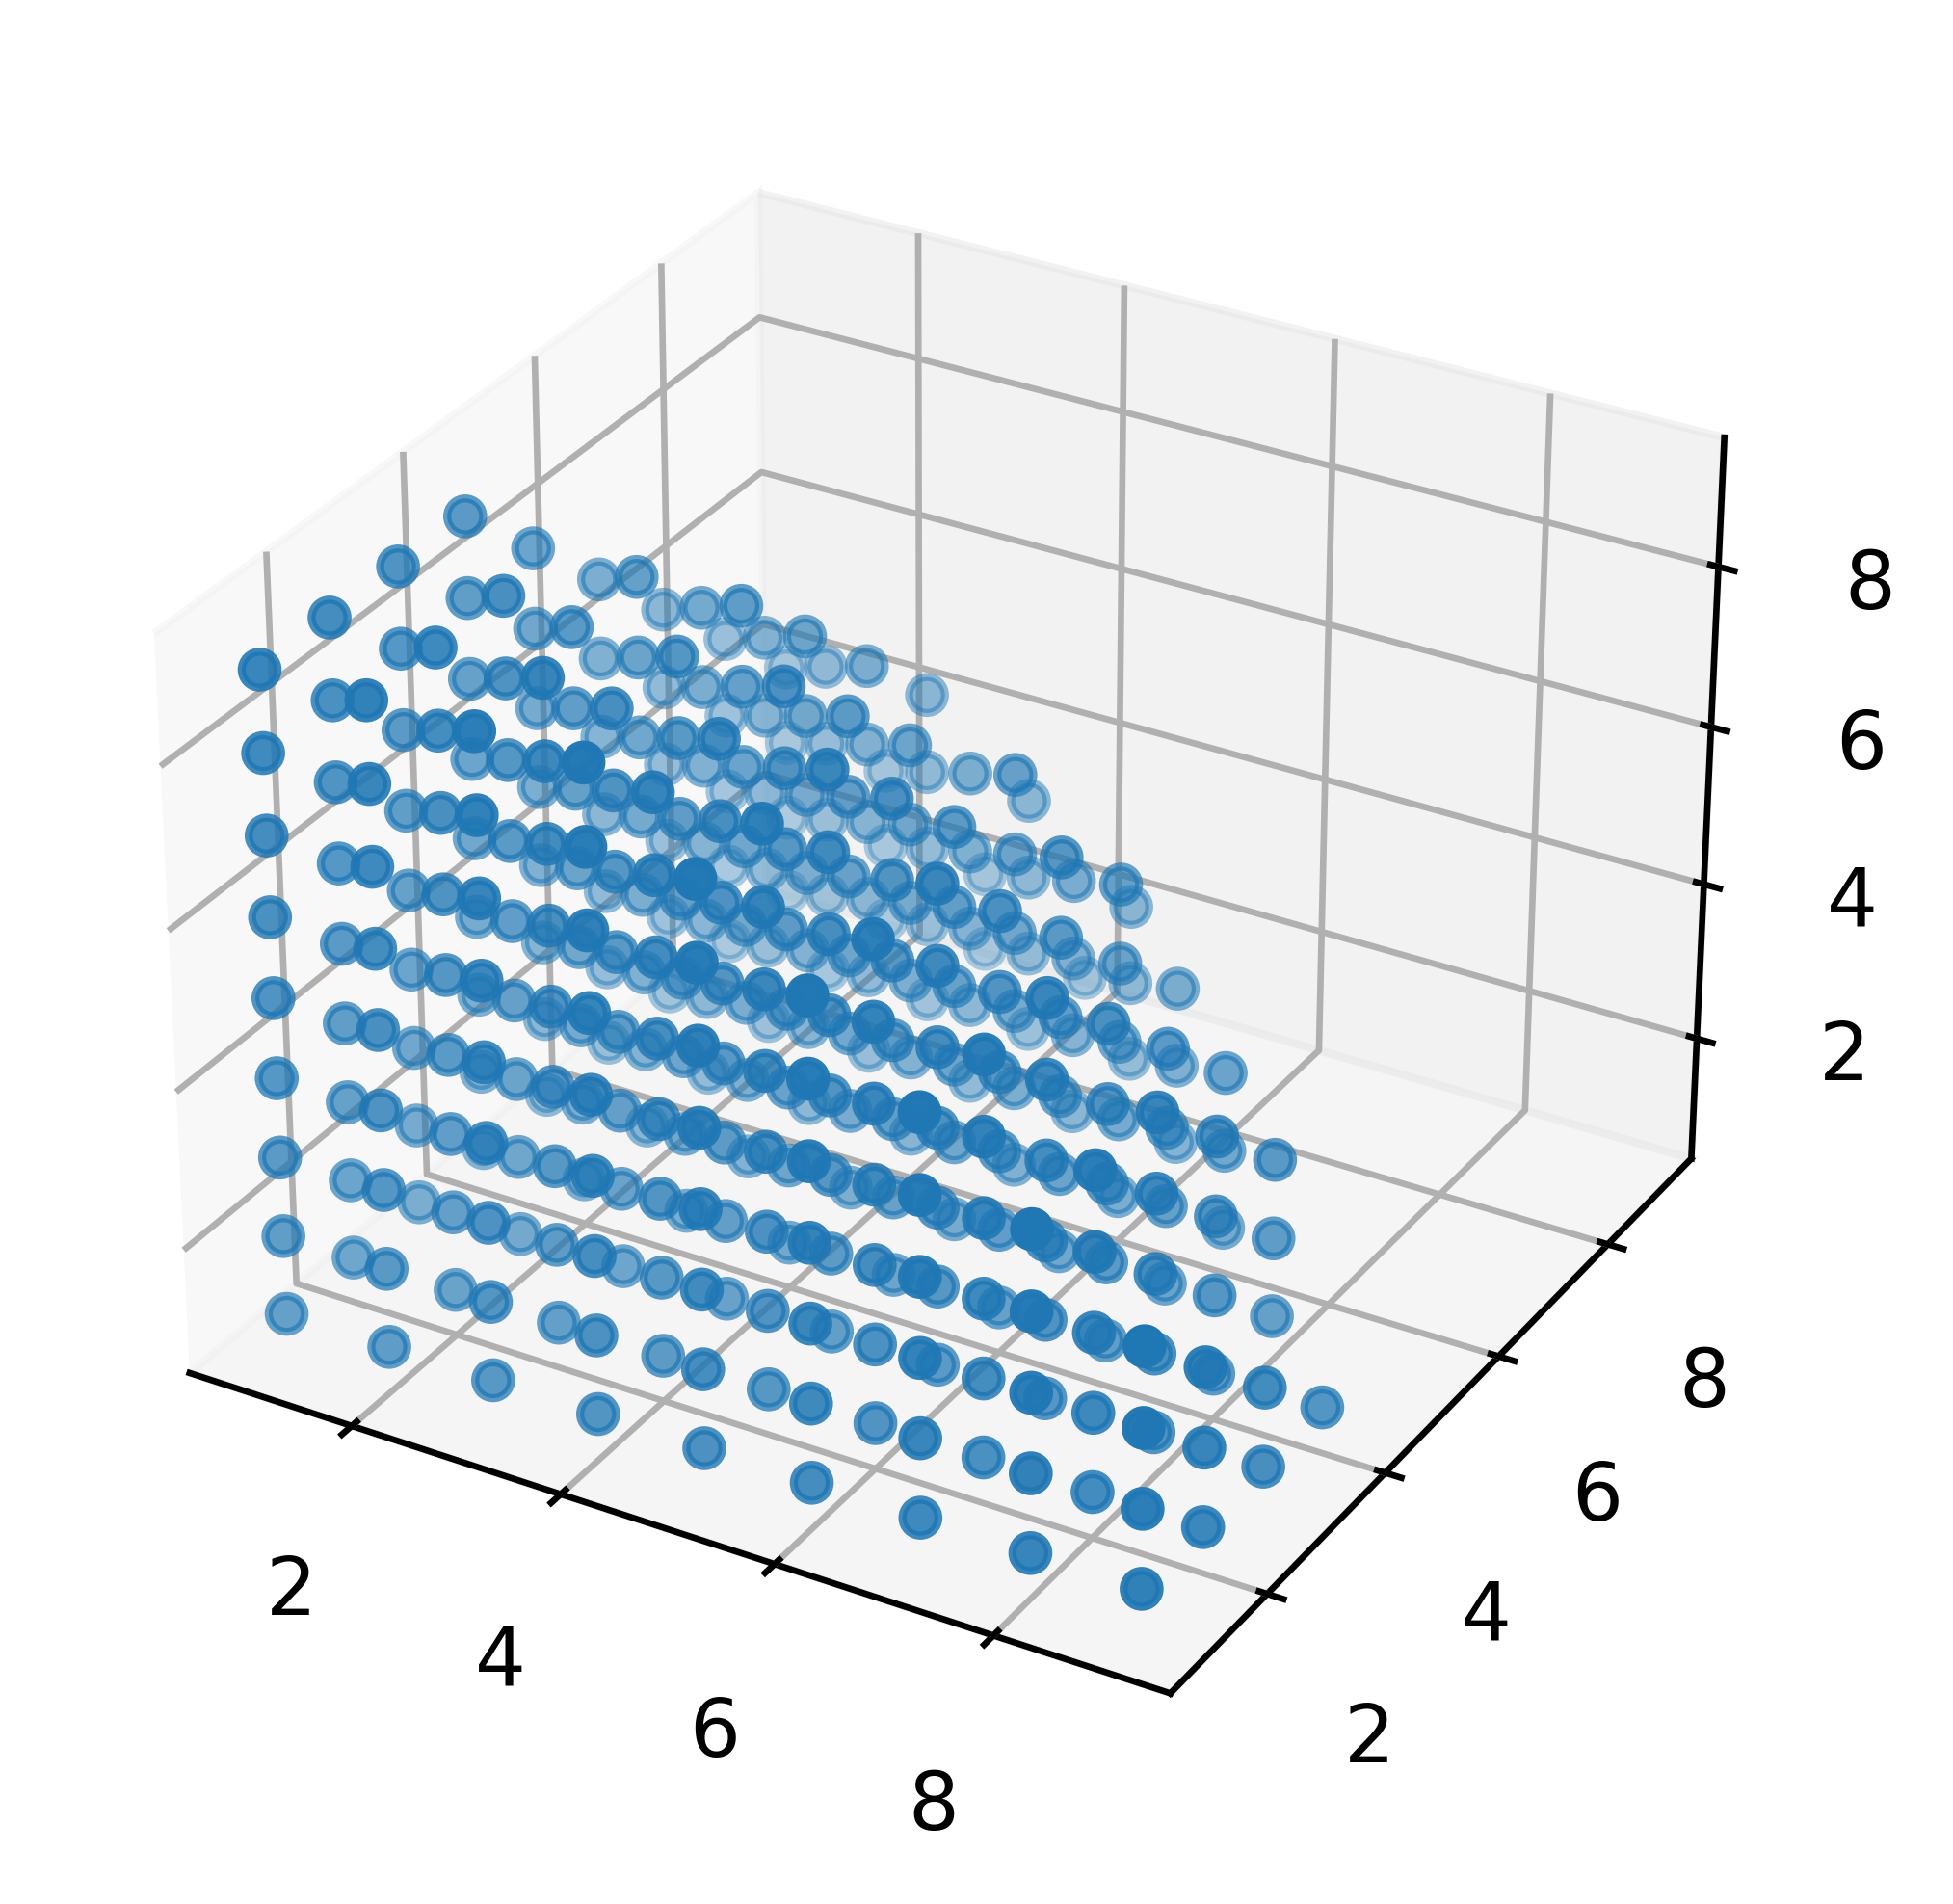

In [7]:
X_s = []
Y_s = []
Z_s = []
for i in range(len(Sigma_solutions)):
    X_s.append(Sigma_solutions[i][0])
    Y_s.append(Sigma_solutions[i][1])
    Z_s.append(Sigma_solutions[i][2])
    
fig = plt.figure(dpi=600)
ax = plt.axes(projection='3d')
ax.scatter3D(X_s, Y_s, Z_s)

It shows that the points are far more regular when $\epsilon\leq 99$ compared to the case of $\epsilon=99$

and here's a plot with the spherical surface included:

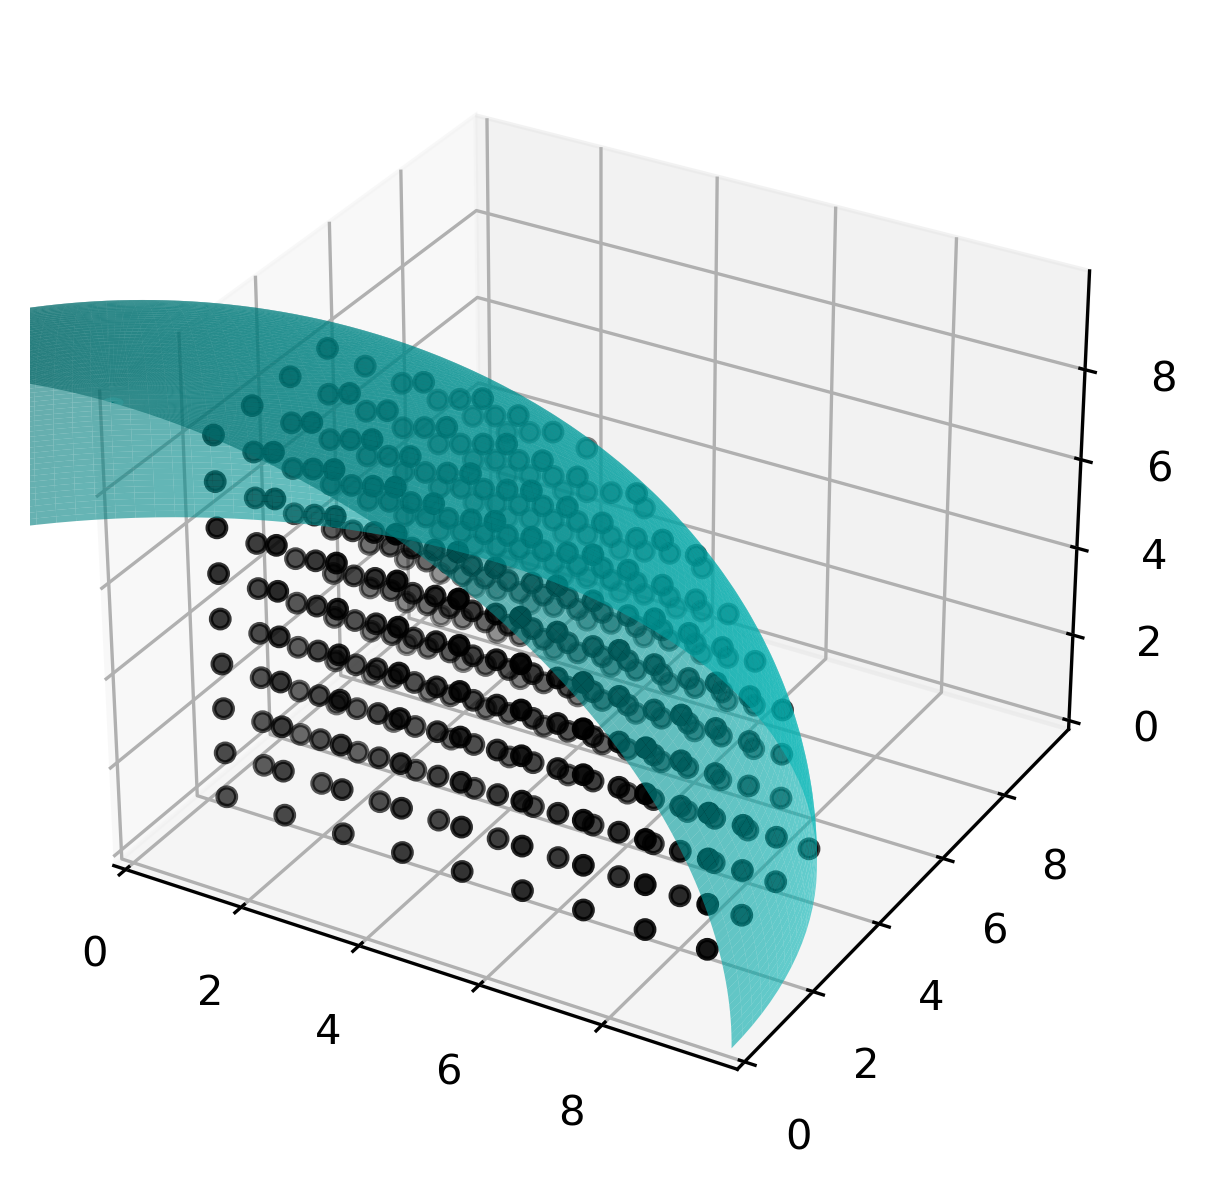

In [8]:
r = np.sqrt(e_star)
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi/2:100j, 0.0:1.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0)
ax.scatter(X_s,Y_s,Z_s,color="k",s=20)
ax.set_xlim([0,r])
ax.set_ylim([0,r])
ax.set_zlim([0,r])
plt.tight_layout()

## Changing $\epsilon^*$

Let's try changing the $\epsilon^*$ value and see how the number of solutions vary

In [9]:
def check(l,m):
    E_star = np.arange(l,m,1)
    count=0
    count2=0
    Sigma_solutions = []
    for Es in E_star:
        count=0
        for x in nx:
            for y in ny:
                for z in nz:
                    if x**2 + y**2 + z**2 == Es:
                        Sigma_solutions.append([x,y,z])
                        count+=1
        print("E* = ",Es,'; No. of new solutions = ',count)
    return None

def check_with_sep(l,m,sep):
    E_star = np.arange(l,m,sep)
    count=0
    Sigma_solutions = []
    for Es in E_star:
        count=0
        for x in nx:
            for y in ny:
                for z in nz:
                    if x**2 + y**2 + z**2 == Es:
                        Sigma_solutions.append([x,y,z])
                        count+=1
        print("E* = ",Es,'; No. of new solutions = ',count)
    return None

## In the range 0 to 100

In [10]:
check(0,100)

E* =  0 ; No. of new solutions =  0
E* =  1 ; No. of new solutions =  0
E* =  2 ; No. of new solutions =  0
E* =  3 ; No. of new solutions =  1
E* =  4 ; No. of new solutions =  0
E* =  5 ; No. of new solutions =  0
E* =  6 ; No. of new solutions =  3
E* =  7 ; No. of new solutions =  0
E* =  8 ; No. of new solutions =  0
E* =  9 ; No. of new solutions =  3
E* =  10 ; No. of new solutions =  0
E* =  11 ; No. of new solutions =  3
E* =  12 ; No. of new solutions =  1
E* =  13 ; No. of new solutions =  0
E* =  14 ; No. of new solutions =  6
E* =  15 ; No. of new solutions =  0
E* =  16 ; No. of new solutions =  0
E* =  17 ; No. of new solutions =  3
E* =  18 ; No. of new solutions =  3
E* =  19 ; No. of new solutions =  3
E* =  20 ; No. of new solutions =  0
E* =  21 ; No. of new solutions =  6
E* =  22 ; No. of new solutions =  3
E* =  23 ; No. of new solutions =  0
E* =  24 ; No. of new solutions =  3
E* =  25 ; No. of new solutions =  0
E* =  26 ; No. of new solutions =  6
E* =  27 ; 

The change in the no. of solutions (when there _is_ a change) increases with large values of $\epsilon^*$

Let me check how the number of solutions vary with higher values of $\epsilon^*$:

## In the range 500 to 600

$\varepsilon = 10000$

In [11]:
e_star = 1000
start_time = time.time()
solutions1000 = []
E_star = np.arange(1,10000,10)
count=0
Sigma_solutions = []
for Es in E_star:
    for x in nx:
        for y in ny:
            for z in nz:
                if x**2 + y**2 + z**2 == Es:
                    Sigma_solutions.append([x,y,z,Es])
                    count+=1
print("--- Executed in %s seconds ---" % round(time.time() - start_time,1))
print("Number of solutions = ",count)
a = np.array(Sigma_solutions)
# print("Solutions:")
# print(tabulate(solutions1, headers=['x', 'y','z'], tablefmt='fancy_grid'))
np.savetxt("op-3.csv", a, delimiter=",")

--- Executed in 1599.0 seconds ---
Number of solutions =  61845


In [12]:
np.savetxt("foo.csv", a, delimiter=",")

In [13]:
E_max = 100
start_time = time.time()
E_star = np.arange(0,E_max,1)
count1=0
count2=0
solutions1 = []
solutions2 = []

# for x in nx:
#         for y in ny:
#             for z in nz:
#                 if x**2 + y**2 + z**2 == E_max:
#                     count1+=1

E_values = []
n_at_E = []
n_leq_E = []
array = []

for Es in E_star:
    count1=0
    for x in nx:
        for y in ny:
            for z in nz:
                if x**2 + y**2 + z**2 == Es:
                    solutions1.append([x,y,z])
                    count2+=1
                    count1+=1
#     print(Es,count1,count2)
#     E_values.append(Es)
#     n_at_E.append(count1)
#     n_at_E.append(count2)
    array.append([Es,count1,count2])
    
    
print("--- Executed in %s seconds ---" % round(time.time() - start_time,1))
print("Number of solutions = ",count2)
# print("Solutions:")
print(tabulate(array, headers=['E value', 'solutions at E','solutions for values <= E'], tablefmt='fancy_grid'))

--- Executed in 129.7 seconds ---
Number of solutions =  410
╒═══════════╤══════════════════╤═════════════════════════════╕
│   E value │   solutions at E │   solutions for values <= E │
╞═══════════╪══════════════════╪═════════════════════════════╡
│         0 │                0 │                           0 │
├───────────┼──────────────────┼─────────────────────────────┤
│         1 │                0 │                           0 │
├───────────┼──────────────────┼─────────────────────────────┤
│         2 │                0 │                           0 │
├───────────┼──────────────────┼─────────────────────────────┤
│         3 │                1 │                           1 │
├───────────┼──────────────────┼─────────────────────────────┤
│         4 │                0 │                           1 │
├───────────┼──────────────────┼─────────────────────────────┤
│         5 │                0 │                           1 │
├───────────┼──────────────────┼─────────────────────────

In [14]:
np.savetxt("new_results_100.csv", array, delimiter=",")

In [15]:
E_max = 1000
start_time = time.time()
E_star = np.arange(0,E_max,1)
count1=0
count2=0
solutions1 = []
solutions2 = []

# for x in nx:
#         for y in ny:
#             for z in nz:
#                 if x**2 + y**2 + z**2 == E_max:
#                     count1+=1

E_values = []
n_at_E = []
n_leq_E = []
array = []

for Es in E_star:
    count1=0
    for x in nx:
        for y in ny:
            for z in nz:
                if x**2 + y**2 + z**2 == Es:
                    solutions1.append([x,y,z])
                    count2+=1
                    count1+=1
#     print(Es,count1,count2)
#     E_values.append(Es)
#     n_at_E.append(count1)
#     n_at_E.append(count2)
    array.append([Es,count1,count2])
    
    
print("--- Executed in %s seconds ---" % round(time.time() - start_time,1))
print("Number of solutions = ",count2)
# print("Solutions:")
# print(tabulate(array, headers=['E value', 'solutions at E','solutions for values <= E'], tablefmt='fancy_grid'))
np.savetxt("new_results_1000.csv", array, delimiter=",")

--- Executed in 1249.5 seconds ---
Number of solutions =  15387


Woah that's a lot! 😅

In [16]:
E_max = 2000
start_time = time.time()
E_star = np.arange(0,E_max,1)
count1=0
count2=0
solutions1 = []
solutions2 = []

# for x in nx:
#         for y in ny:
#             for z in nz:
#                 if x**2 + y**2 + z**2 == E_max:
#                     count1+=1

E_values = []
n_at_E = []
n_leq_E = []
array = []

for Es in E_star:
    count1=0
    for x in nx:
        for y in ny:
            for z in nz:
                if x**2 + y**2 + z**2 == Es:
                    solutions1.append([x,y,z])
                    count2+=1
                    count1+=1
#     print(Es,count1,count2)
#     E_values.append(Es)
#     n_at_E.append(count1)
#     n_at_E.append(count2)
    array.append([Es,count1,count2])
    
    
print("--- Executed in %s seconds ---" % round(time.time() - start_time,1))
print("Number of solutions = ",count2)
# print("Solutions:")
# print(tabulate(array, headers=['E value', 'solutions at E','solutions for values <= E'], tablefmt='fancy_grid'))
np.savetxt("new_results_2000.csv", array, delimiter=",")

--- Executed in 2666.5 seconds ---
Number of solutions =  44500


😱